In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
%matplotlib inline

In [68]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
svc=LinearSVC(random_state=0).fit(X_train,y_train) 
print("training set score:{:.3f}".format(svc.score(X_train,y_train)))
print("test set score:{:.3f}".format(svc.score(X_test,y_test)))

training set score:0.937
test set score:0.916


In [69]:
svc01=LinearSVC(C=0.1,random_state=0).fit(X_train,y_train) #default C=1,C越大模型越灵活
print("training set score:{:.3f}".format(svc01.score(X_train,y_train)))
print("test set score:{:.3f}".format(svc01.score(X_test,y_test)))

training set score:0.892
test set score:0.923


In [43]:
LinearSVC?

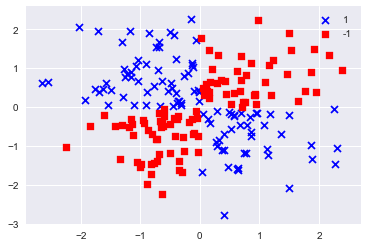

In [70]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()

我们可以定义
$$\phi (x_1,x_2)=(z1,z2,z3)=(x_1,x_2,x_1^2+x_2^2)$$ 

![](img/svm-kernel-ex.png)

高斯核  $K(x,y)=\exp (-\frac{{{\left\| x-y \right\|}^{2}}}{2{{\sigma }^{2}}})$  ，定义$\gamma=\frac{1}{2\sigma^2}$，那么我们得到

$$ K(x,y)=\exp (-\gamma{{\left\| x-y \right\|}^{2}}) $$

对原空间内相近的两个向量$x、y$计算 结果的数值较大，反之较小，参数$\sigma$ 控制这核函数值随${{\left\| x-y \right\|}^{2}}$变化的速度

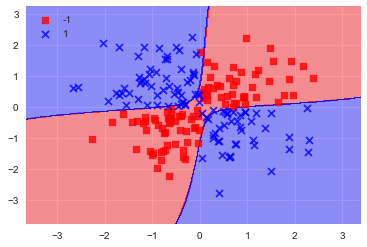

In [55]:
from sklearn.svm import SVC
from util.plot_decision import plot_decision_regions
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')

# gamma越大越容易导致过拟合

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



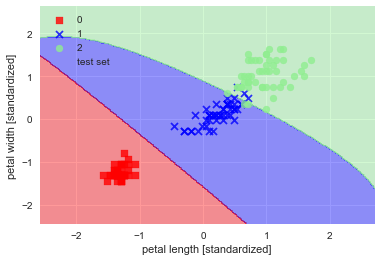

In [58]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

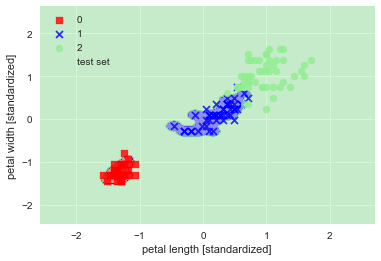

In [59]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

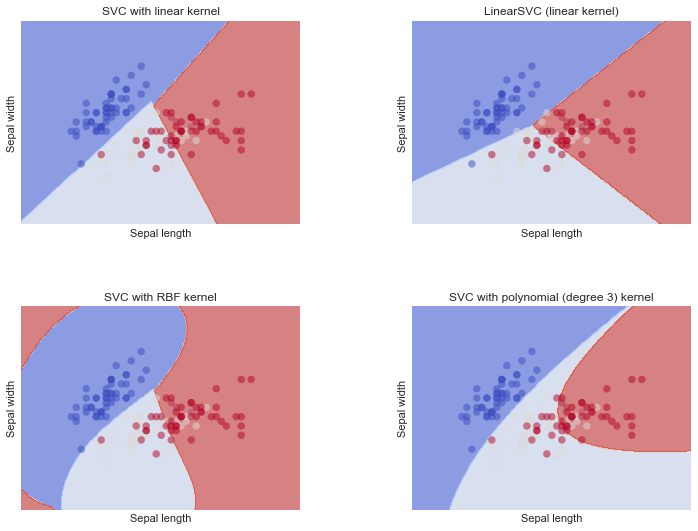

In [67]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

plt.figure(figsize=(12,9))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,alpha=0.5)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

![](img/plot_svm_parameters_selection_1.png)


RBF SVM 的c与$\gamma$ 选择 http://cs.stanford.edu/people/karpathy/svmjs/demo/